In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Cleaning Event Detection

Author: Clemens Jochum

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.data.import_data import import_df_from_zip_pkl

from src.data.make_dataset import remove_clipping_with_flexible_window, remove_clipping_with_universal_window, downsample_dataframe

from src.models.detect_soiling import detect_cleaning_events_with_rollling_avg

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

#plt.rcParams["figure.figsize"] = [10, 5]
#plt.rcParams['figure.dpi'] = 250
#'font.size': 10, 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125

### Import Datasets

Use a random dataset for each type of synthetic data.

In [4]:
path_to_data_raw = '../data/raw/'

list_data_keys = ['basic', 'soil', 'soil_weather', 'weather']
list_index_random = np.ones(len(list_data_keys), dtype=np.int)
#list_index_random = np.random.randint(50, size=len(list_data_keys))

dict_index_dataset = {}
for (data_key, dataset_index) in zip(list_data_keys, list_index_random):
    dict_index_dataset[data_key] = dataset_index
    
dict_data_paths = {}
for data_key in list_data_keys:
    dict_data_paths[data_key] = '{0:s}/synthetic_{1:s}.zip'.format(path_to_data_raw, data_key)

In [5]:
dict_df = {}
for data_key in list_data_keys:
    dict_df[data_key] = {}
    dict_df[data_key]['T'] = import_df_from_zip_pkl(dict_data_paths[data_key], dict_index_dataset[data_key])

### Resample Datasets

Downsample minutes ('T') to hours ('H'), days ('D'), weeks ('W'), months ('MS'), and years ('AS') using mean.

In [6]:
list_resample_rules = ['D', 'W', 'MS', 'AS']

dict_label_resample_rules = {
    'T' : 'minute',
    'H' : 'hour',
    'D' : 'day',
    'W' : 'week',
    'MS' : 'month',
    'AS' : 'year',
}

dict_timeunits_per_year = {
    'MS' : 12,
    'W' : 52,
    'D' : 365,
    'H' : 24 * 365,
    'T' : 60 * 24 * 365,
}

In [7]:
for data_key in list_data_keys:
    for resample_rule in list_resample_rules:
        #dict_df[data_key]['T'] = remove_clipping_with_universal_window(dict_df[data_key]['T'])
        dict_df[data_key][resample_rule] = downsample_dataframe(dict_df[data_key]['T'], 
                                                                offset = resample_rule)

### Detect cleaning events


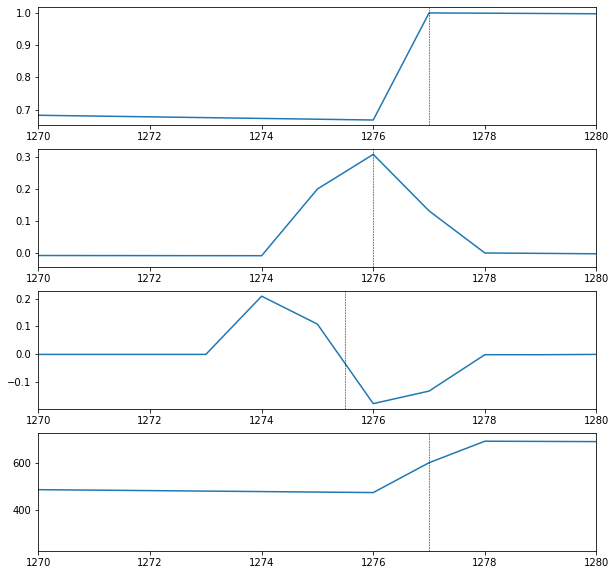

In [20]:
df = dict_df['soil']['D']
cleaning_profile, cleaning_events_index, cleaning_events_height = detect_cleaning_events_with_rollling_avg(df['Power'])

plt.rcParams["figure.figsize"] = [10, 10]
fig, axarr = plt.subplots(4)

axarr[0].plot(df['Soiling'].to_numpy())
axarr[1].plot(cleaning_profile)
axarr[2].plot(np.diff(cleaning_profile))
axarr[3].plot(df['Power'].to_numpy())

for pos in cleaning_events:
    axarr[0].axvline(x=pos-0.0, color='k', linestyle='--', linewidth=0.5)
    axarr[1].axvline(x=pos-1.0, color='k', linestyle='--', linewidth=0.5)
    axarr[2].axvline(x=pos-1.5, color='k', linestyle='--', linewidth=0.5)
    axarr[3].axvline(x=pos-0.0, color='k', linestyle='--', linewidth=0.5)

xmin, xmax = 0, df['Power'].size
#xmin, xmax = 1000, 1100
xmin, xmax = 1270, 1280
axarr[0].set_xlim([xmin, xmax])
axarr[1].set_xlim([xmin, xmax])
axarr[2].set_xlim([xmin, xmax])
axarr[3].set_xlim([xmin, xmax])

plt.show()

#for i in range(cleaning_events_index.size):
#    print(cleaning_events_index[i], cleaning_events_height[i])

In [21]:
help(detect_cleaning_events_with_rollling_avg)

Help on function detect_cleaning_events_with_rollling_avg in module src.models.detect_soiling:

detect_cleaning_events_with_rollling_avg(power_signal, window_size_l=3, window_size_r=3, window_overlap=1, avg_function=<function amax at 0x7fc7ac0b98b0>, cleaning_peak_distance=3, cleaning_peak_prominence=0.0125)
    Detect the cleaning events in a power-signal
    
    Calculate the cleaning profile by computing the relative difference between
    two rolling window averages with an overlap, cleaning events are identified
    as peaks in this cleaning profile
    
        Args:
            power_signal (pandas.Series): time-series of the power-signal in
                pandas format
            window_size_l (int, optional): size of the left rolling window,
                defaults to 3 (good value for daily time-series)
            window_size_r (int, optional): size of the right rolling window,
                defaults to 3 (good value for daily time-series)
            window_overlap (i

In [10]:
#cleaning_events = np.where(np.diff(cleaning_profile, 2) <= -0.020)[0]
#cleaning_events += 1 #np.ones(cleaning_events.shape)
#print(cleaning_events)
#np.mean(cleaning_events[i + (window_size - 1)], cleaning_events[i - (window_size - 1)])
#cleaning_events = np.where(cleaning_profile 
#cleaning_events += 1 #np.ones(cleaning_events.shape)
#print(cleaning_events)
#print(df['Power'].to_numpy()[0:10], df['Power'].to_numpy()[-10:])
#print(cleaning_profile[0:10], cleaning_profile[-10:])